<a href="https://colab.research.google.com/github/tolgaenginn/ergasia5/blob/main/ergasia5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#QUESTION 1
Load the MNIST dataset of black-and-white handwritten digits, which contains 70,000 handwritten digits (0 to 9)

In [ ]:
from tensorflow.keras.datasets import mnist

#load
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

#QUESTION 2
Display 1 plot for each digit (choose the examples randomly from the dataset).


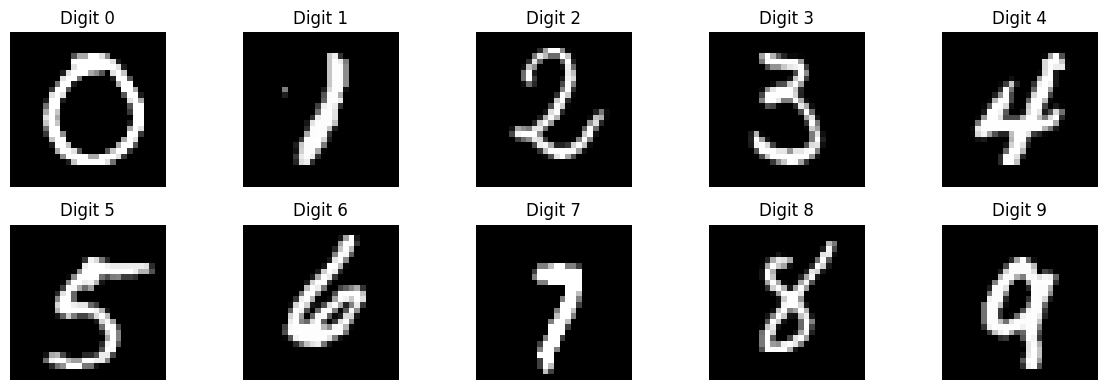

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

examples = []

for digit in range(10):
    indices = np.where(y_train == digit)[0]
    rand_index = np.random.choice(indices)
    examples.append(x_train[rand_index])

plt.figure(figsize=(12, 4))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(examples[i], cmap='gray')
    plt.title(f"Digit {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()


#QUESTION 3
What is the size of each image? Are all pixels of a digit’s image important? Justify your answer.

In [ ]:
x_train[0].shape

(28, 28)

each image is 28x28. so in total 784 pixels for each image. not every pixel is important as most of them are black and do not play a role in identifying the number. the white ones play a more key role as they help us to distiguish the number

#QUESTION 4
Convert the images (x_train, x_test) into vectors

In [ ]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat  = x_test.reshape(x_test.shape[0], -1)

x_train_flat.shape, x_test_flat.shape

((60000, 784), (10000, 784))

#QUESTION 5
Train KNN classifiers with

𝑘 = 5, 15, 51, sqrt(𝑁)

where N is the number of examples in the train set.
Then compute the accuracy score on the train and test sets.
Afterwards, create a line plot with the horizontal axis =
k and the vertical axis = accuracy.

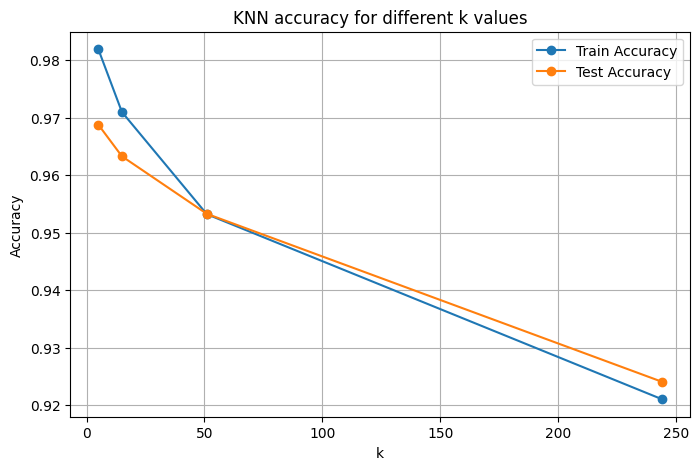

In [ ]:
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# k values
N = x_train_flat.shape[0]
ks = [5, 15, 51, int(math.sqrt(N))]

train_acc = []
test_acc = []

for k in ks:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train_flat, y_train)

    y_pred_train = model.predict(x_train_flat)
    y_pred_test  = model.predict(x_test_flat)

    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))

# plots
plt.figure(figsize=(8,5))
plt.plot(ks, train_acc, marker='o', label='Train Accuracy')
plt.plot(ks, test_acc, marker='o', label='Test Accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("KNN accuracy for different k values")
plt.legend()
plt.grid(True)
plt.show()


#QUESTION 6
Next, divide x_train and x_test by 255 so that pixel values scale to the range [0,1] and repeat Question 5.
Compare your results with Question 5.

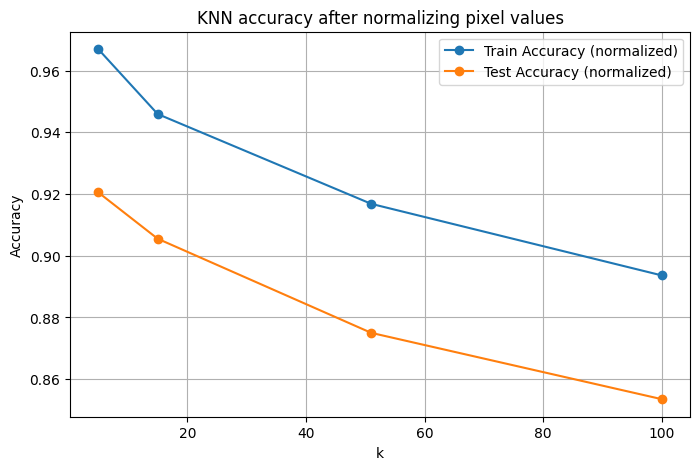

In [ ]:
x_train_norm = x_train_flat / 255.0
x_test_norm  = x_test_flat  / 255.0

# smaller subset for speed
subset = 10000
x_train_small = x_train_norm[:subset]
y_train_small = y_train[:subset]

x_test_small = x_test_norm[:2000]
y_test_small = y_test[:2000]

#k values again
N = x_train_small.shape[0]
ks = [5, 15, 51, int(math.sqrt(N))]

train_acc_norm = []
test_acc_norm = []

for k in ks:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train_small, y_train_small)

    y_pred_train = model.predict(x_train_small)
    y_pred_test  = model.predict(x_test_small)

    train_acc_norm.append(accuracy_score(y_train_small, y_pred_train))
    test_acc_norm.append(accuracy_score(y_test_small, y_pred_test))

plt.figure(figsize=(8,5))
plt.plot(ks, train_acc_norm, marker='o', label='Train Accuracy (normalized)')
plt.plot(ks, test_acc_norm, marker='o', label='Test Accuracy (normalized)')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("KNN accuracy after normalizing pixel values")
plt.legend()
plt.grid(True)
plt.show()


in question 5 and 6 both cases the accuracy drop when k increases

#QUESTION 7
Use Paint (or any drawing tool) to draw a digit of your choice in a 28×28 image.
Specifically:
*   fill the background with black
*   draw the digit using white

Then:
*   upload the image to Google Colab
*   convert it to grayscale
*   check if the best classifier from Question 6 can correctly classify your digit.


Saving number 4.png to number 4 (1).png
Predicted digit: 1


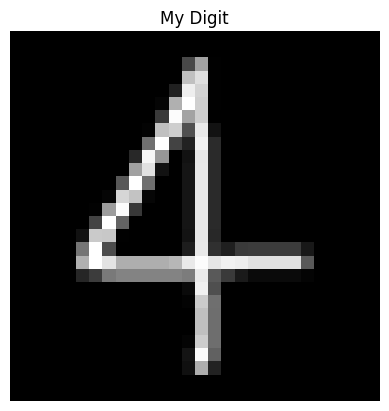

In [15]:
from google.colab import files
from PIL import Image

uploaded = files.upload()

img = Image.open("number 4.png").convert("L")
img = img.resize((28, 28))
img_arr = np.array(img)

img_flat = img_arr.reshape(1, -1) / 255.0

# knn again
best_k = 5

model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(x_train_small, y_train_small)

prediction = model.predict(img_flat)
print("Predicted digit:", prediction[0])

plt.imshow(img_arr, cmap='gray')
plt.title("My Digit")
plt.axis('off')
plt.show()


it predicted wrong